In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h1 style=" text-align:center; color:Blue; font-size:40px;"> <u><b> Kalp Krizi Tahmini</b></u> </h1>


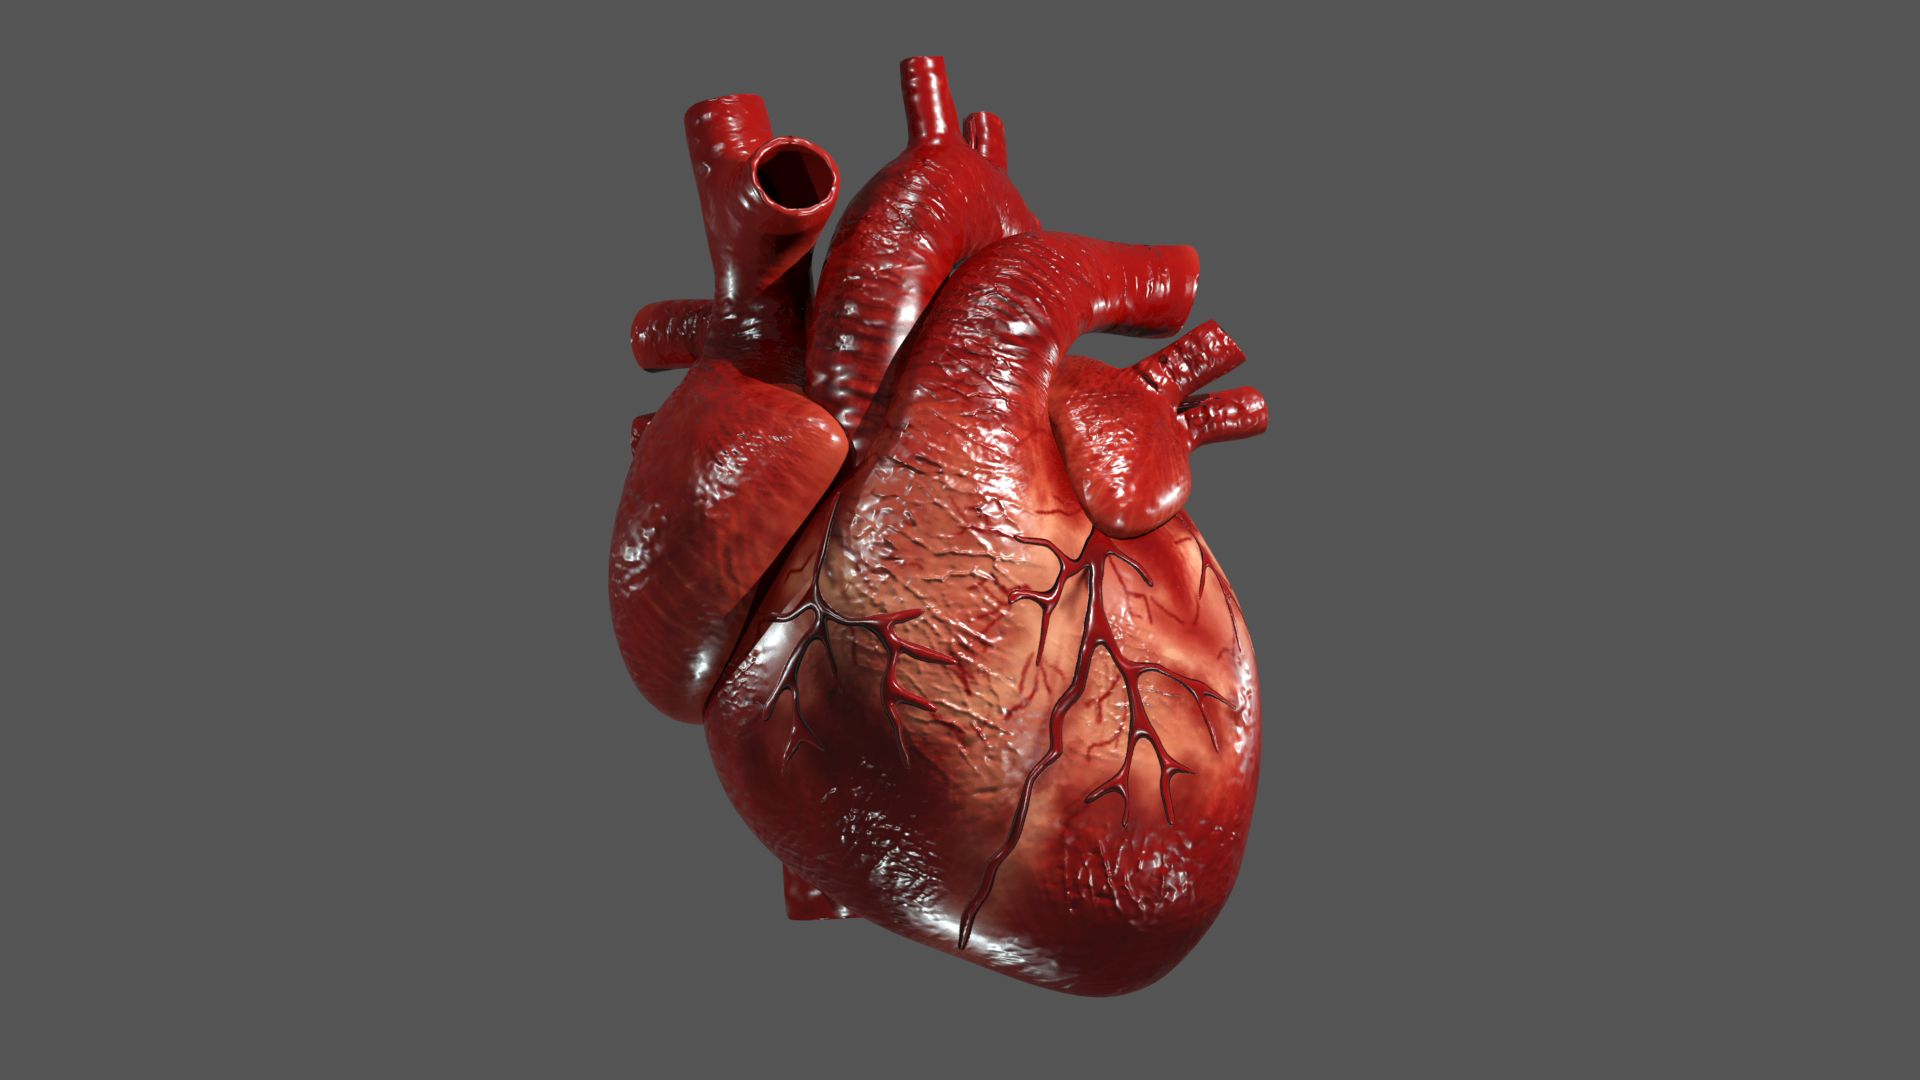

#***Dataset Hakkında**

Age: Age of the patient (yaş)

Gender: Gender of the patient (cinsiyet)

Heart rate: Heart rate achieved  (Kalp atış hızı)

Systolic Blood Pressure:(Sistolik tansiyon)

Diastolic Blood Pressure:(Dinlenme kan basıncı (mm Hg cinsinden))

Blood sugar: (fasting blood sugar > 120 mg/dl), 1 = True, 0 = False (açlık kan şekeri: (açlık kan şekeri > 120 mg/dl), 1 = Doğru, 0 = Yanlış)

CK-MB:CK-MB, özellikle miyokard enfarktüsü (kalp krizi) gibi durumlarda kalp kası hasarı belirlemek için kullanılır

Troponin:Negatif veya pozitif çıkışlı troponin.Troponin, kandaki seviyeleri arttığında, hastaların kanındaki troponin seviyelerinin ölçülmesi, kalp krizi tanısı, tedavisi ve takibi için önemli bir araçtır.

output: Target variable (çıktı: Hedef değişken)

Kalp krizi veri setleri Ocak 2019'dan Mayıs 2019'a kadar Irak'ın Erbil kentindeki Zheen hastanesinde toplandı. Bu veri setinin özellikleri şunlardır: yaş, cinsiyet, kalp atış hızı, sistolik kan basıncı, diyastolik kan basıncı, kan şekeri, ck-mb ve Negatif veya pozitif çıkışlı troponin. Sağlanan bilgilere göre tıbbi veri seti kalp krizini ya da kalp krizini sınıflandırıyor. Verilerdeki cinsiyet sütunu normalize edilmiştir: erkek 1'e ve kadın 0'a ayarlanmıştır. Glikoz sütunu > 120 ise 1'e; aksi takdirde 0. Çıkışa gelince, pozitif 1'e ve negatif 0'a ayarlanır.

#***Kütüphane İmport Ve Dataset İşlemleri***

In [3]:
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC,SVR
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score,mean_squared_error
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


***Veri Setini Okuma***

In [4]:
import pandas as pd
heart=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Medicaldataset.csv')
heart.head()

,Age,Gender,HeRa,SyBlooPre,DiBoPres,BlooSug,CK-MB,Trop,Output
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


***DataFrame'in şeklini kontrol etme***

In [5]:
print('Number of rows are',heart.shape[0], 'and number of columns are ',heart.shape[1])

Number of rows are 1319 and number of columns are  9


***Boş değerlerin kontrol edilmesi***

In [6]:
heart.isnull().sum()/len(heart)*100

Age          0.0
Gender       0.0
HeRa         0.0
SyBlooPre    0.0
DiBoPres     0.0
BlooSug      0.0
CK-MB        0.0
Trop         0.0
Output       0.0
dtype: float64

**Boş değer bulunamadı**

***Niteliklerin veri türleri kontrol ediliyor***

In [7]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1319 non-null   int64  
 1   Gender     1319 non-null   int64  
 2   HeRa       1319 non-null   int64  
 3   SyBlooPre  1319 non-null   int64  
 4   DiBoPres   1319 non-null   int64  
 5   BlooSug    1319 non-null   float64
 6   CK-MB      1319 non-null   float64
 7   Trop       1319 non-null   float64
 8   Output     1319 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.9 KB


***Yinelenen satırlar kontrol ediliyor***

In [8]:
heart[heart.duplicated()]


,Age,Gender,HeRa,SyBlooPre,DiBoPres,BlooSug,CK-MB,Trop,Output


***Yinelenenleri kaldırma***

In [9]:
heart.drop_duplicates(keep='first',inplace=True)


**Yeni şekil kontrol ediliyor**

In [10]:
print('Number of rows are',heart.shape[0], 'and number of columns are ',heart.shape[1])

Number of rows are 1319 and number of columns are  9


***İstatistiksel verilerin kontrol edilmesi***

In [11]:
heart.describe()

,Age,Gender,HeRa,SyBlooPre,DiBoPres,BlooSug,CK-MB,Trop,Output
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942,0.614102
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568,0.486991
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000,0.000000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000,0.000000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000,1.000000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500,1.000000
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000,1.000000


***Correlation matrisinin hesaplanması***

In [12]:
heart.corr()

,Age,Gender,HeRa,SyBlooPre,DiBoPres,BlooSug,CK-MB,Trop,Output
Age,1.000000,-0.092874,-0.023440,0.017441,0.002614,-0.004193,0.018419,0.088800,0.238097
Gender,-0.092874,1.000000,-0.026781,0.011065,-0.009370,0.006668,0.017527,0.065793,0.094432
HeRa,-0.023440,-0.026781,1.000000,0.010882,0.108353,-0.019584,-0.013001,0.011180,0.006920
SyBlooPre,0.017441,0.011065,0.010882,1.000000,0.586166,0.020807,-0.016396,0.043729,-0.020825
DiBoPres,0.002614,-0.009370,0.108353,0.586166,1.000000,-0.025614,-0.023403,0.043360,-0.009659
BlooSug,-0.004193,0.006668,-0.019584,0.020807,-0.025614,1.000000,0.045757,0.021069,-0.033059
CK-MB,0.018419,0.017527,-0.013001,-0.016396,-0.023403,0.045757,1.000000,-0.016008,0.217720
Trop,0.088800,0.065793,0.011180,0.043729,0.043360,0.021069,-0.016008,1.000000,0.229376
Output,0.238097,0.094432,0.006920,-0.020825,-0.009659,-0.033059,0.217720,0.229376,1.000000


# ***Veri Görselleştirme***

***Cinsiyet dağılımı***

Cinsiyeti 1 olan kişi sayısı 449 ve cinsiyeti 0 olan kişi sayısı 870


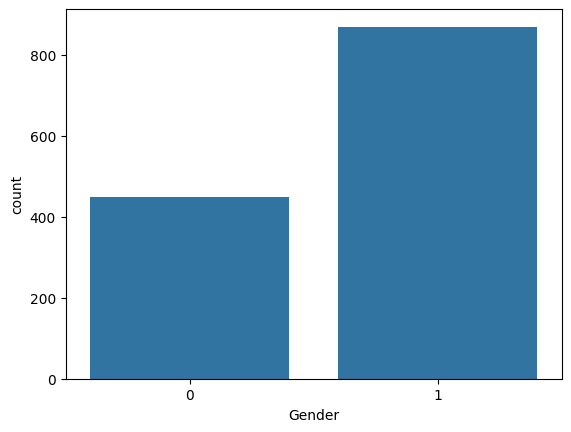

In [32]:
x=(heart.Gender.value_counts())
print(f'Cinsiyeti 1 olan kişi sayısı {x[0]} ve cinsiyeti 0 olan kişi sayısı {x[1]}')
p = sns.countplot(data=heart, x="Gender")
plt.show()

**Cinsiyeti 1 olan kişiler cinsiyeti 0 olanların iki katından fazladır**

***Kalp Atış hızı Ayrıntıları***

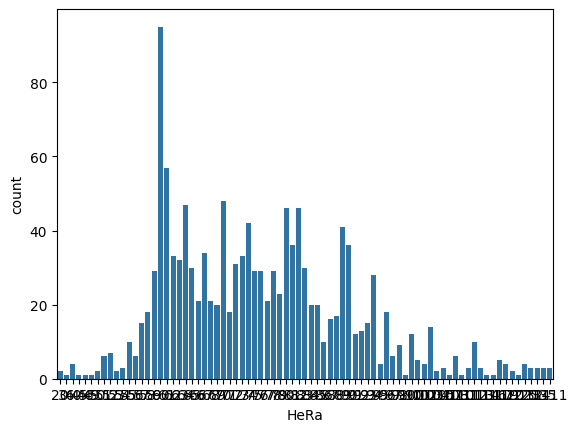

In [14]:
x=(heart.HeRa.value_counts())
p = sns.countplot(data=heart, x="HeRa")
plt.show()

***Kan Şekeri Dağılımı***

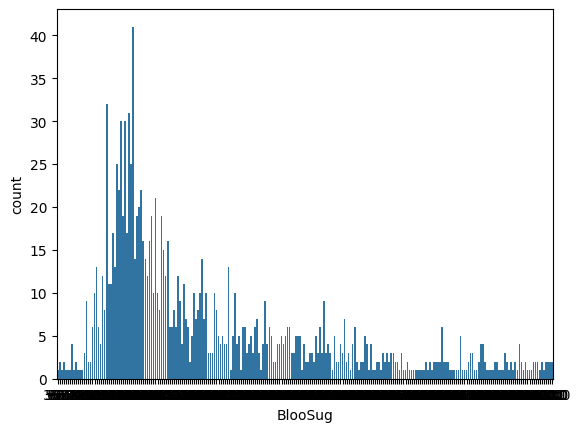

In [15]:
x=(heart.BlooSug.value_counts())
p = sns.countplot(data=heart, x="BlooSug")
plt.show()



>0 değerine sahip FBS, 1 değerinden önemli ölçüde yüksektir.

***Yaşa göre yoğunluk dağılımı***

<Figure size 1000x1000 with 0 Axes>

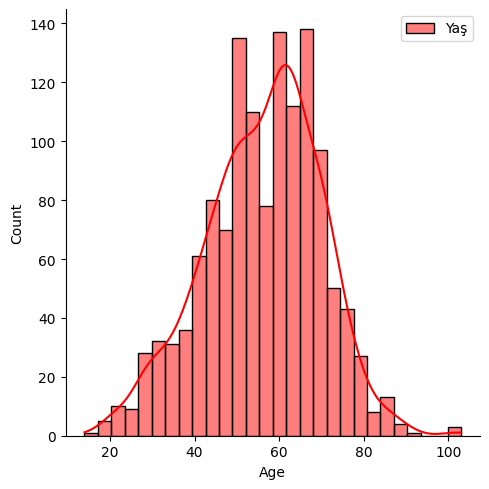

In [33]:
plt.figure(figsize=(10,10))
sns.displot(heart.Age, color="red", label="Yaş", kde= True)
plt.legend()

*Yoğunluk dağılımı 55-65 yaş grubu için en yüksektir*


***Dinlenme Kan Basıncı Dağılımı***

<Figure size 2000x2000 with 0 Axes>

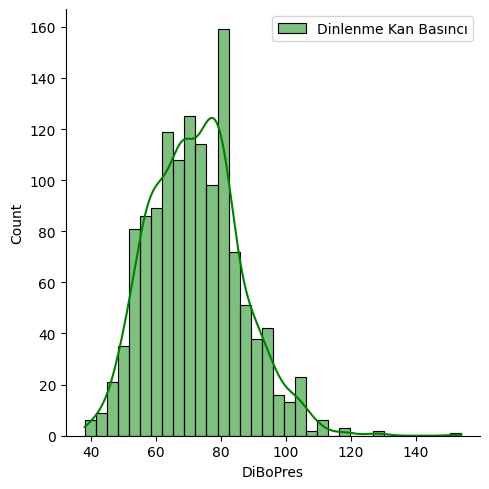

In [17]:
plt.figure(figsize=(20,20))
sns.displot(heart.DiBoPres , color="green", label="Dinlenme Kan Basıncı", kde= True)
plt.legend()

***Dinlenme Kan Baıncı 90 civarında en yüksek sayıya sahip***

***Kalp Krizi ve Yaş Karşılaştırması***

<ipython-input-19-95fcd48d270f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart[heart['Output'] == 0]["Age"], color='green',kde=True,)
<ipython-input-19-95fcd48d270f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart[heart['Output'] == 1]["Age"], color='red',kde=True)


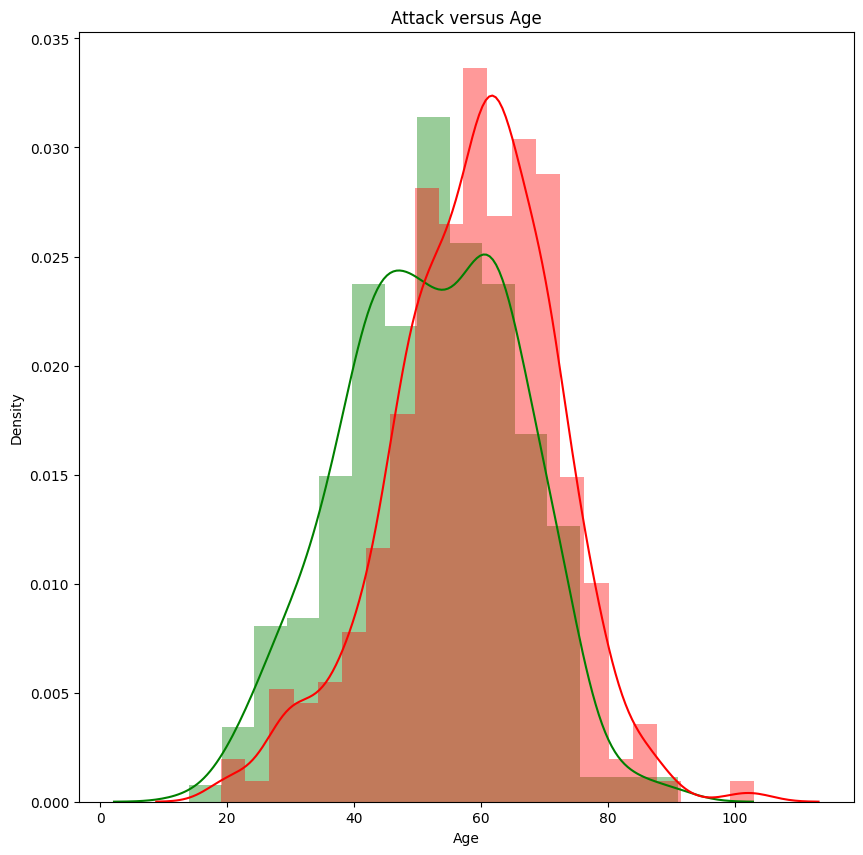

In [18]:
plt.figure(figsize=(10,10))
sns.distplot(heart[heart['Output'] == 0]["Age"], color='green',kde=True,)
sns.distplot(heart[heart['Output'] == 1]["Age"], color='red',kde=True)
plt.title('Attack versus Age')
plt.show()



***Çk-MB ve Yaş Karşılaştırması***

<ipython-input-20-4ad20734c21e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart[heart['Output'] == 0]["CK-MB"], color='green',kde=True,)
<ipython-input-20-4ad20734c21e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart[heart['Output'] == 1]["CK-MB"], color='red',kde=True)


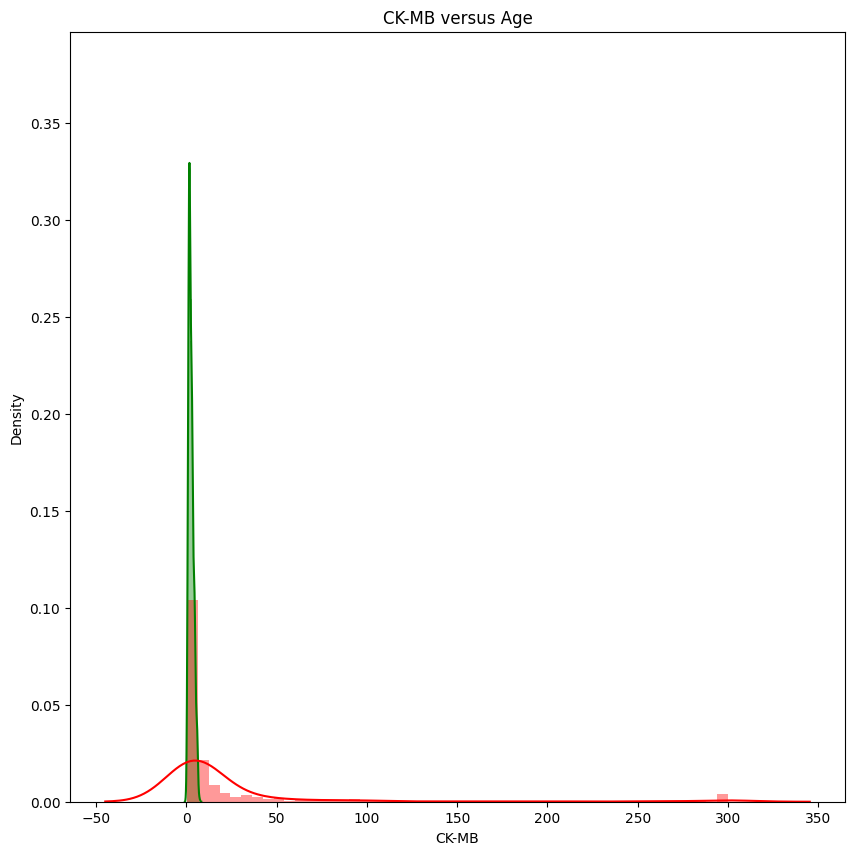

In [19]:
plt.figure(figsize=(10,10))
sns.distplot(heart[heart['Output'] == 0]["CK-MB"], color='green',kde=True,)
sns.distplot(heart[heart['Output'] == 1]["CK-MB"], color='red',kde=True)
plt.title('CK-MB versus Age')
plt.show()

***Dinlenme Kalp Basıncı Ve Yaş Karşılaştırması***

<ipython-input-21-3e3672fbab2f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart[heart['Output'] == 0]["Trop"], color='green',kde=True,)
<ipython-input-21-3e3672fbab2f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart[heart['Output'] == 1]["Trop"], color='red',kde=True)


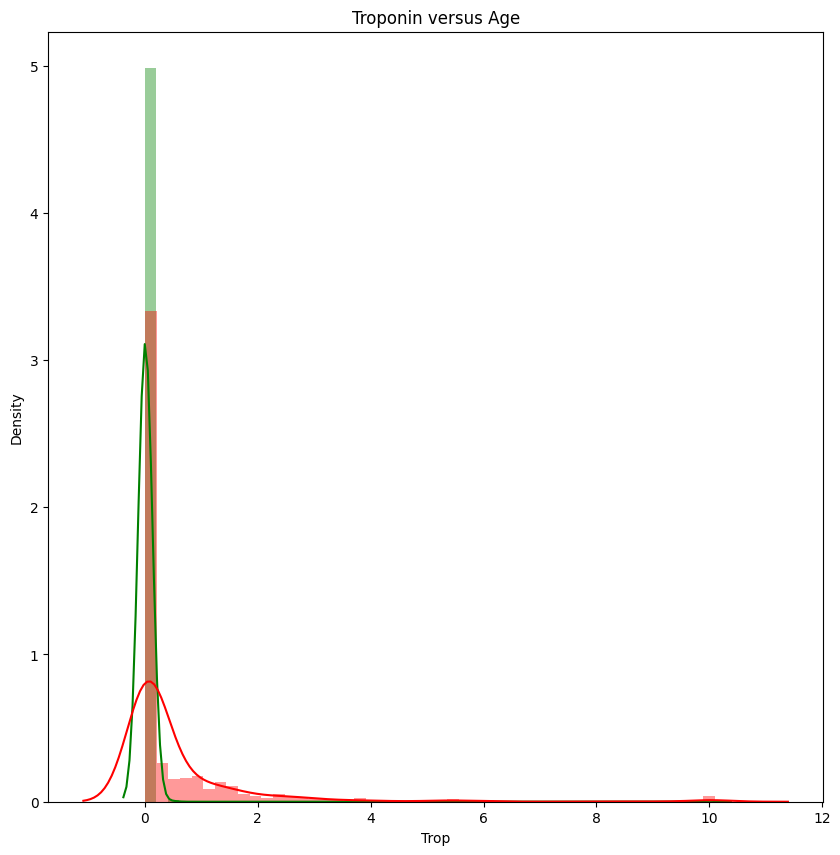

In [20]:
plt.figure(figsize=(10,10))
sns.distplot(heart[heart['Output'] == 0]["Trop"], color='green',kde=True,)
sns.distplot(heart[heart['Output'] == 1]["Trop"], color='red',kde=True)
plt.title('Troponin versus Age')
plt.show()

<ipython-input-22-bcaa8d569eaa>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart[heart['Output'] == 0]["HeRa"], color='green',kde=True,)
<ipython-input-22-bcaa8d569eaa>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart[heart['Output'] == 1]["HeRa"], color='red',kde=True)


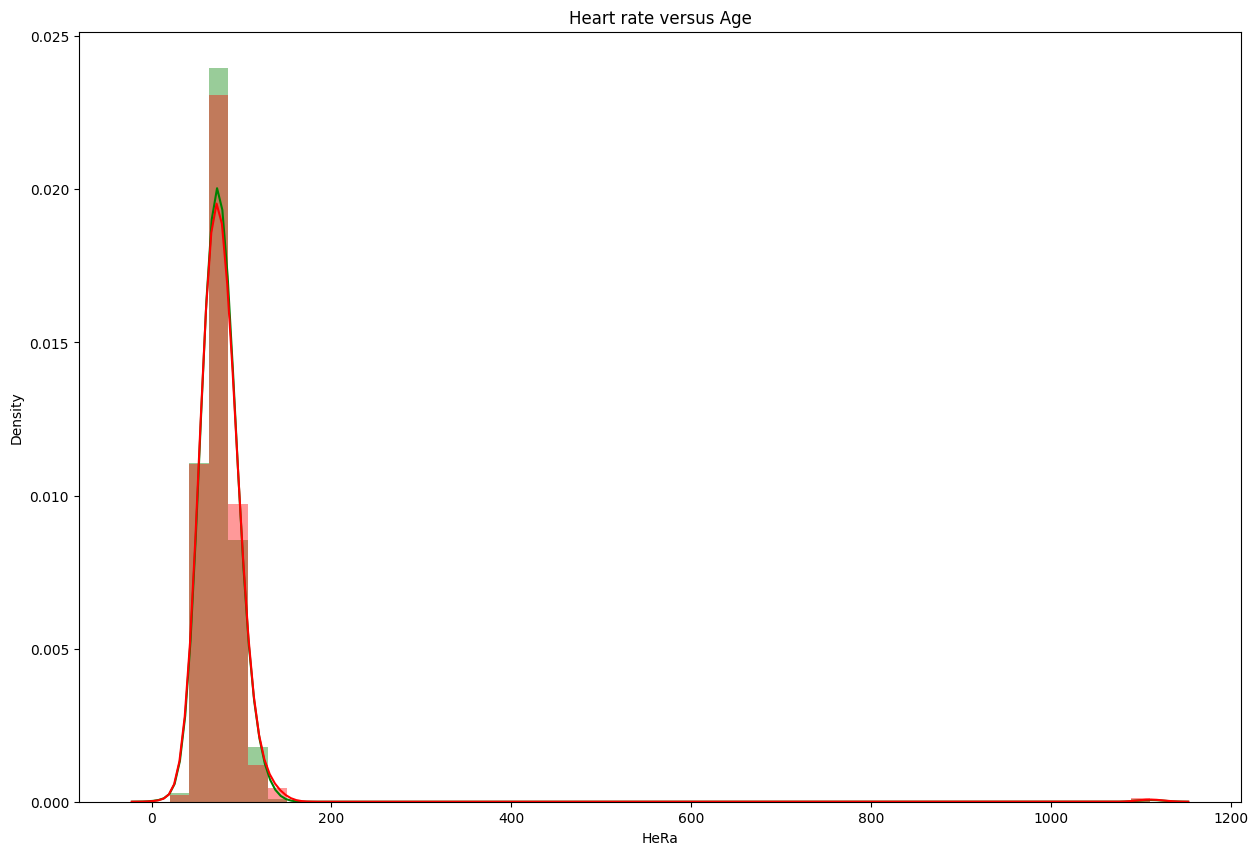

In [21]:
plt.figure(figsize=(15,10))
sns.distplot(heart[heart['Output'] == 0]["HeRa"], color='green',kde=True,)
sns.distplot(heart[heart['Output'] == 1]["HeRa"], color='red',kde=True)
plt.title('Heart rate versus Age')
plt.show()


# ***Pair Plot(Çift Grafiği) ve Violin Plot("Keman Grafiği")***

<Figure size 2000x2000 with 0 Axes>

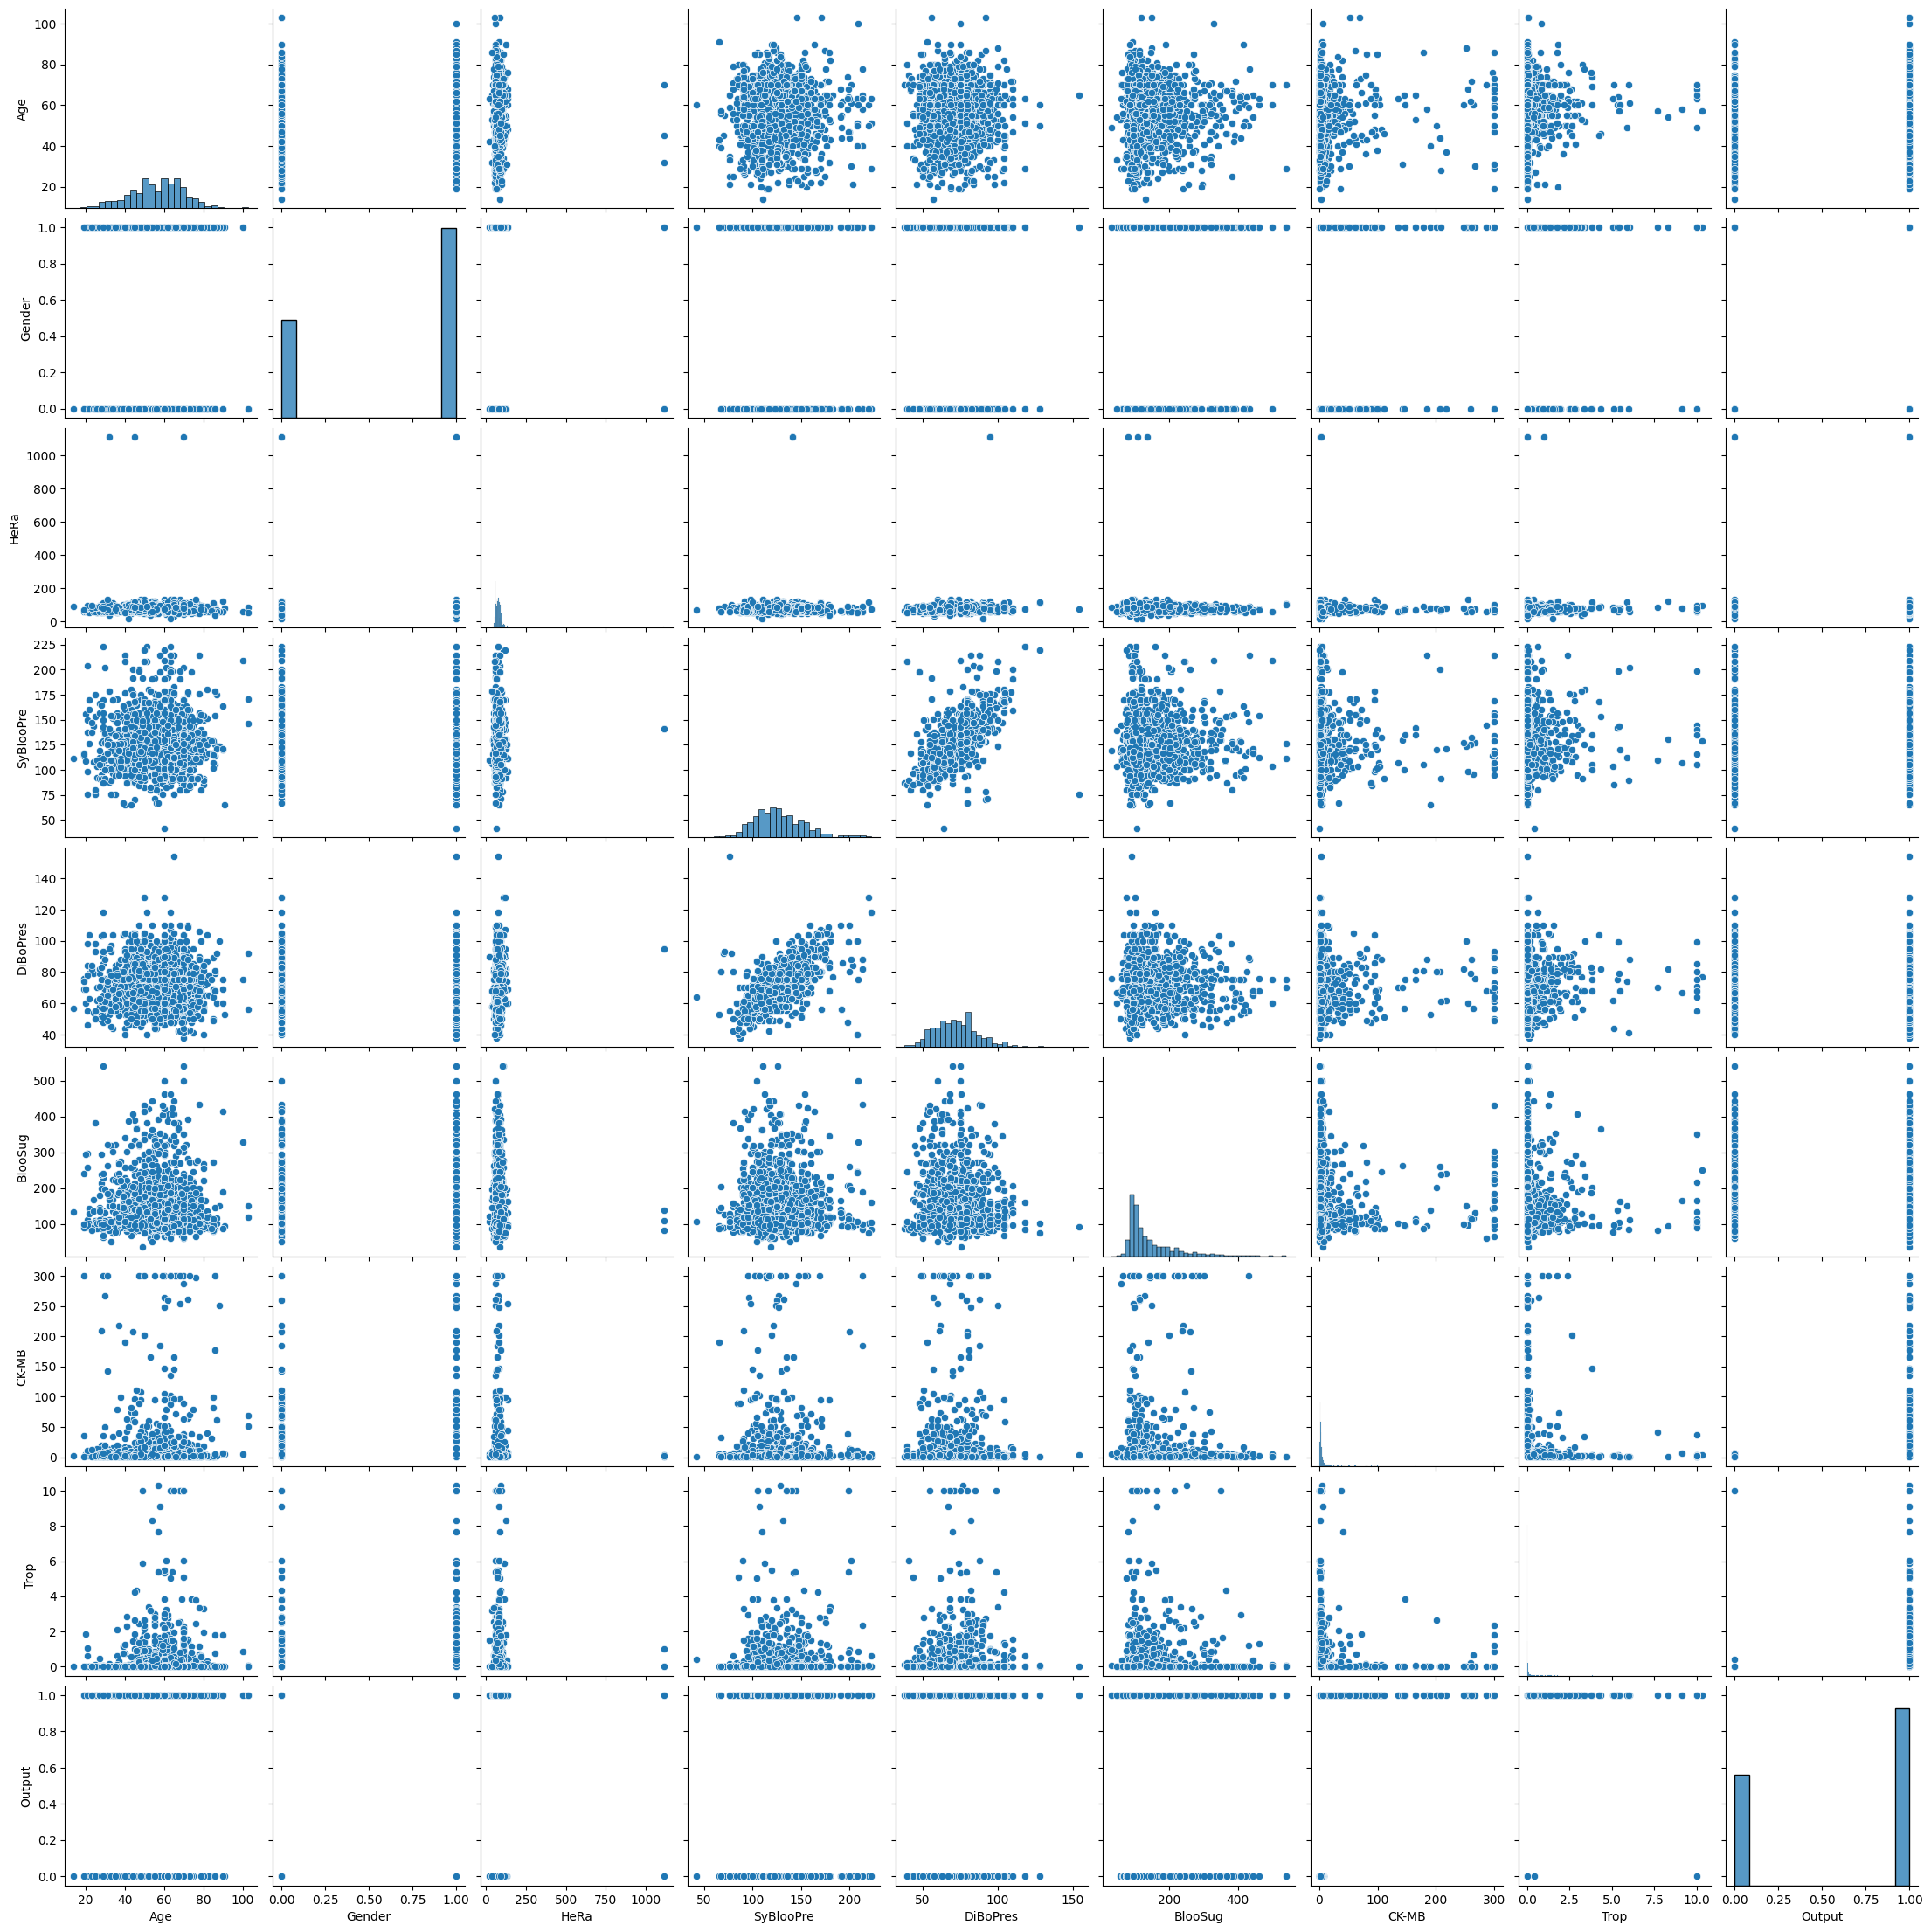

In [22]:
plt.figure(figsize=(20,20))
sns.pairplot(heart)
plt.show()

***Violin Plot("Keman Grafiği")***

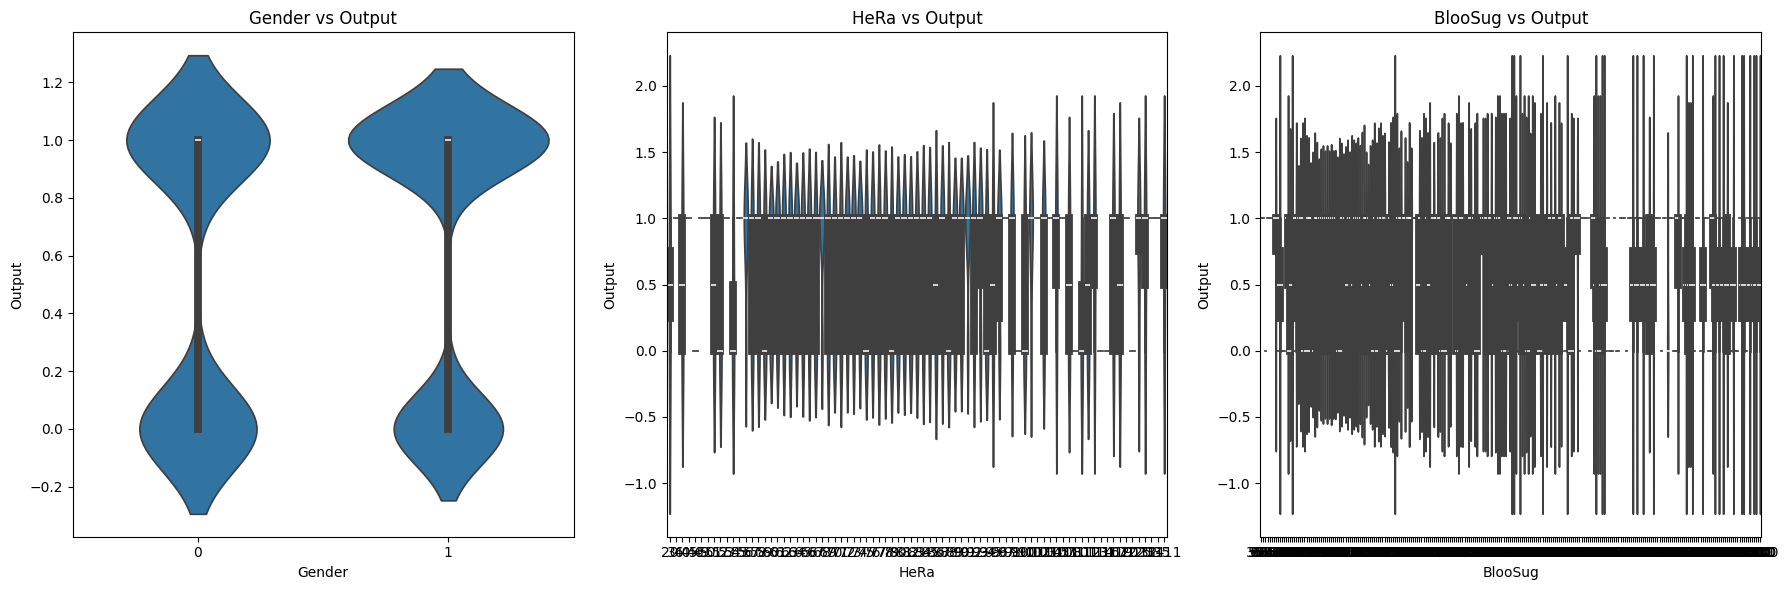

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Figür boyutlarını belirle
plt.figure(figsize=(18,6))

# Birinci grafik
plt.subplot(1, 3, 1)
sns.violinplot(x='Gender', y='Output', data=heart)
plt.title('Gender vs Output')

# İkinci grafik
plt.subplot(1, 3, 2)
sns.violinplot(x='HeRa', y='Output', data=heart)
plt.title('HeRa vs Output')

# Üçüncü grafik
plt.subplot(1, 3, 3)
sns.violinplot(x='BlooSug', y='Output', data=heart)
plt.title('BlooSug vs Output')

# Grafiklerin gösterilmesi
plt.tight_layout()
plt.show()


# **"Veri Ön İşleme"**

**"Kategorik Kodlamaya Gerek Yok"**

In [24]:
x = heart.iloc[:, 1:-1].values
y = heart.iloc[:, -1].values
x,y

(array([[1.000e+00, 6.600e+01, 1.600e+02, ..., 1.600e+02, 1.800e+00,
         1.200e-02],
        [1.000e+00, 9.400e+01, 9.800e+01, ..., 2.960e+02, 6.750e+00,
         1.060e+00],
        [1.000e+00, 6.400e+01, 1.600e+02, ..., 2.700e+02, 1.990e+00,
         3.000e-03],
        ...,
        [1.000e+00, 8.500e+01, 1.680e+02, ..., 9.600e+01, 1.240e+00,
         4.250e+00],
        [1.000e+00, 5.800e+01, 1.170e+02, ..., 4.430e+02, 5.800e+00,
         3.590e-01],
        [1.000e+00, 9.400e+01, 1.570e+02, ..., 1.340e+02, 5.089e+01,
         1.770e+00]]),
 array([0, 1, 0, ..., 1, 1, 1]))

**Veri kümesini eğitim ve test verilerine bölme**

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)


In [26]:
print('Shape for training data', x_train.shape, y_train.shape)
print('Shape for testing data', x_test.shape, y_test.shape)

Shape for training data (1055, 7) (1055,)
Shape for testing data (264, 7) (264,)


**Feature Scaling ("Özellik Ölçeklendirme")**

In [27]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#**ANN ve Modellerin Eğitimi**#

---



<a id="4"></a> <br>
<center><h1 style="color:#5F9EA0;">Artificial Neural Networks</h1></center>
<p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>
    <p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>

<center><img src="https://miro.medium.com/max/1100/1*YgJ6SYO7byjfCmt5uV0PmA.png" width=600></center>


## ANN Tablo

In [28]:
path_tablo = "/content/drive/MyDrive/Colab Notebooks/ysa ann tablo.xlsx"

In [29]:
import pandas as pd

# Excel dosyasını oku
dataset_2 = pd.read_excel(path_tablo)

from tabulate import tabulate

# DataFrame'i tabloya dönüştür
table = tabulate(dataset_2, headers='keys', tablefmt='fancy_grid')

# Tablo görünümünü yazdır
print(table)

╒════╤═══════════════╤══════════╤═════════════════╤════════════════╤═════════════════════════╤═════════════════╤════════════╕
│    │   Epok Sayısı │   Test % │   Katman Sayısı │   Nöron Sayısı │ Aktivasyon Fonksiyonu   │   Learning rate │   Accuracy │
│    │               │          │                 │                │                         │                 │      (ACC) │
╞════╪═══════════════╪══════════╪═════════════════╪════════════════╪═════════════════════════╪═════════════════╪════════════╡
│  0 │           100 │       20 │               3 │            128 │ relu                    │            0.01 │       0.51 │
├────┼───────────────┼──────────┼─────────────────┼────────────────┼─────────────────────────┼─────────────────┼────────────┤
│  1 │           500 │       20 │               3 │            128 │ relu                    │            0.01 │       0.71 │
├────┼───────────────┼──────────┼─────────────────┼────────────────┼─────────────────────────┼─────────────────┼──────

## ANN Model

In [34]:
# Linear Regression modelini eğitelim
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

# Lojistik regresyon modelini tanımla ve eğit
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

# SVM modelini eğitelim
svm_model = SVC()
svm_model.fit(x_train, y_train)

# Random Forest modelini eğitelim
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(x_train, y_train)

# XGBoosting modelini eğitelim
model = xgb.XGBClassifier(use_label_encoder=False)
model.fit(x_train, y_train)

predicted = model.predict(x_test)

cm = confusion_matrix(y_test, predicted)
# ANN modellerini tanımlayalım
class ANN(nn.Module):
    def __init__(self, input_dim):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 16)
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 1)


    def forward(self, x):
        x = F.relu(self.fc1(x))  # ReLU aktivasyon fonksiyonu uygula
        x = F.relu(self.fc2(x))  # ReLU aktivasyon fonksiyonu uygula
        x = self.fc3(x)

        return x



# ANN modelini eğitelim
ann_model = ANN(x_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(ann_model.parameters(), lr=0.01)

for epoch in range(1000):
    inputs = torch.tensor(x_train, dtype=torch.float32)
    targets = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

    optimizer.zero_grad()
    outputs = ann_model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()


lr_score = lr_model.score(x_test, y_test)
lojR_score = logistic_model.score(x_test, y_test)
svm_score = svm_model.score(x_test, y_test)
rf_score = rf_model.score(x_test, y_test)

inputs = torch.tensor(x_test, dtype=torch.float32)
targets = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)
ann_outputs = ann_model(inputs)
ann_score = 1 - criterion(ann_outputs, targets).item() / torch.var(targets).item()


print("Linear Regression Score:", lr_score)
print("Lojistik Regression Score:", lojR_score)
print("SVM Score:", svm_score)
print("Random Forest Score:", rf_score)
print("ANN Score (Model 1):", ann_score)
print()
print ("The accuracy of X Gradient Boosting is : ", accuracy_score(y_test, predicted)*100, "%")



Linear Regression Score: 0.1244934524663992
Lojistik Regression Score: 0.7992424242424242
SVM Score: 0.6856060606060606
Random Forest Score: 0.9874358082706767
ANN Score (Model 1): 0.847932855734375

The accuracy of X Gradient Boosting is :  99.62121212121212 %


 # **"Sonuç"**

1. Modellerin çoğu gerçekten iyi performans gösteriyor.
2. X Gradient Boosting ve Random Forest  verilen veri kümesi için en iyi performansı gösteriyor.